# Univariate Gaussian Process

This package implements a univariate Bayesian Optimization with the Gaussian Process used as the surrogate model
and visualisation of the optimization process using Plots.

This package could be a great tool to visualize Gaussian processes to get a better understanding of them
and/or to experiment with Bayesian optimization with different acquisition functions, covariance functions
and other hyperparameters.

## Bayesian Optimization - brief introduction

Bayesian optimization is an optimization technique which cleverly selects evaluation points
from the objective function domain to optimize it while minimizing the number of its evaluations.

The main advantages of Bayesian optimization is that it can optimize black-box
and it is effective for optimizing functions which are computationally expensive to evaluate.

Bayesian optimization works as follows:
1. Select the next evaluation point by maximizing the acquisition function.
2. Evaluate the objective function at the selected point.
3. Augment the data with the new evaluation.
4. Update the surrogate model based on the data.
5. Repeat.

Terms:
- **objective function** - The to-be-optimized function. Can be blackbox, usually is expensive to evaluate.
- **acquisition function** - A function which to each point of the domain assigns a fitness
                          for being the point of the next evaluation.
- **data** - Contains the information from all previous objective function evaluations.
- **surrogate model** - A probabilistic model estimating the objective function.

Despite its name, Bayesian optimization can also be used to approximate functions
instead of optimizing them by using a different acquisition functions.

## Gaussian Process - brief introduction

Gaussian process can be used as the surrogate model for the Bayesian optimization.

Gaussian process represents the estimated value of the objective function at each point of the domain
as a one-dimensional normal distribution. This means that the approximation of the whole objective function
(assuming its continuous) is an infinite-dimensional normal distribution over all possible forms
the objective function could have.

## Example usage

Let's assume that we wish to maximize a black-box objective function. That means that we can query
the objective function for values at any point of its domain but we do not know its analytical form.
Furthermore, let's assume that we are limited in the number of evaluations we can perform because this
unknow function takes a very long time to evaluate. Let's say we can only perform 10 evaluations.

Let's define this function and the bounds within which we want maximize it.
Furthermore, let's assume that we are limited to 5 evaluations.

In [1]:
obj_func(x::Real) = sin(x)

bounds = (-π, π);
evals = 10;

Here, the objective function is simply sinus, but pretend that we do not know that.

Now let's maximize our objective function using the UnivariateGaussianProcess package.

First load the package.

In [2]:
using Revise
using UnivariateGaussianProcess

Now we have to choose the parameters of the Bayesian optimization
as well as the Gaussian process surrogate model.

In [3]:
cov_func = matern3;
acq_func = (x, data) -> 3 * ei(x, data) + 1/2;

We will use the `matern1` covariance function for the Gaussian process
and the `expected improvement` acquisition function for the Bayesian optimization.

(Note that the coeficients in the acquisition function definition have no effect on the optimization process.
They are there just to make the generated plots more readable.)

Now we can run the algorithm.

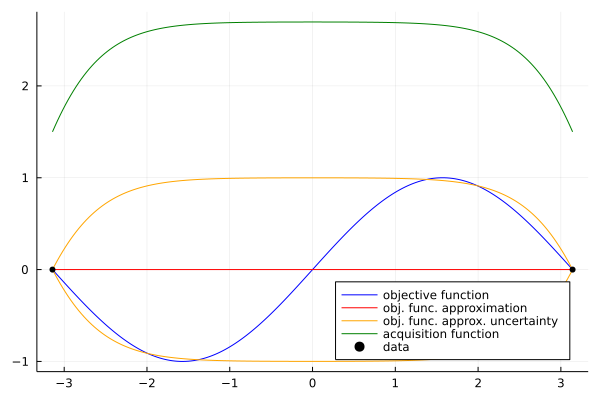

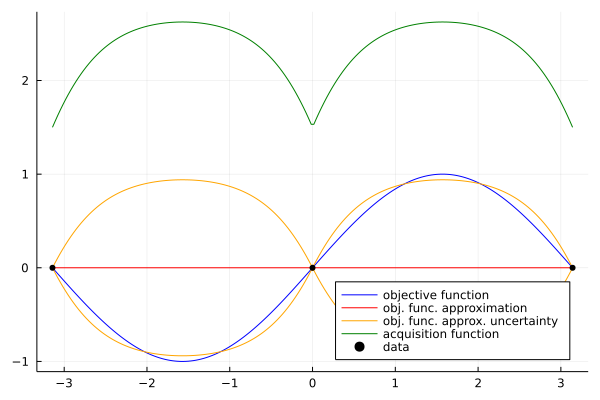

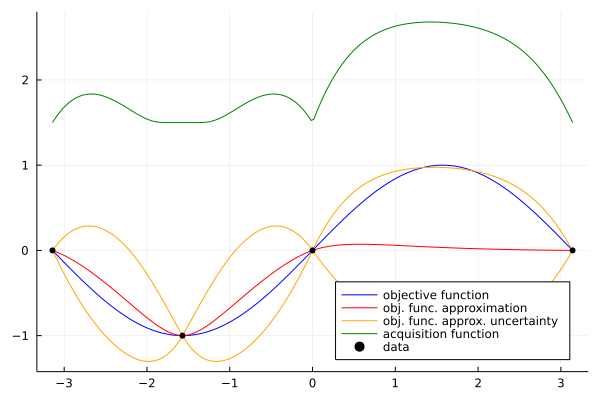

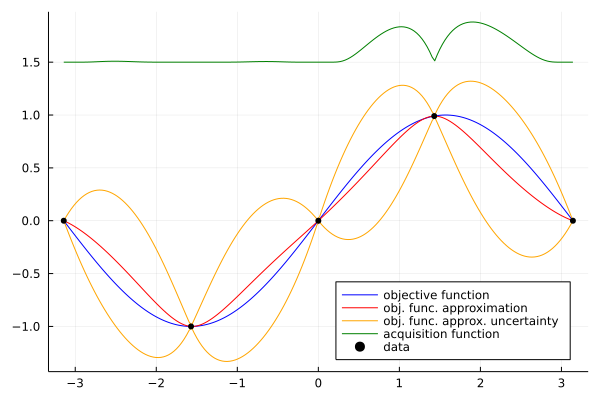

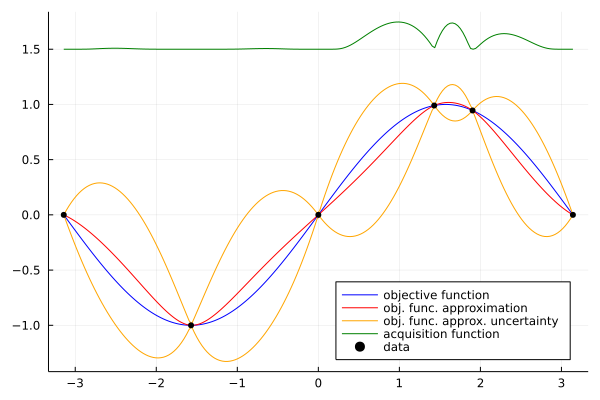

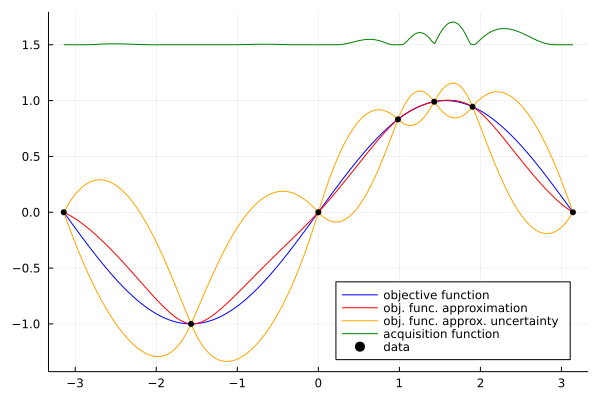

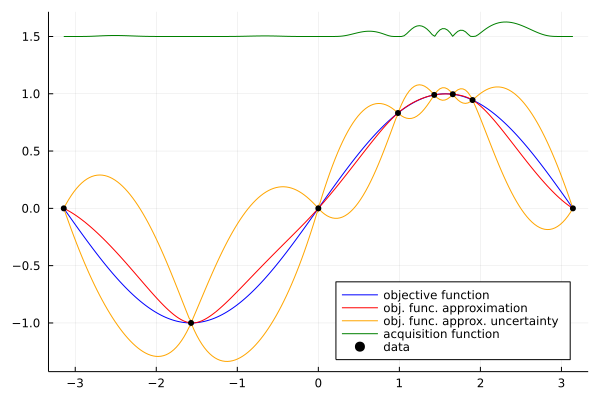

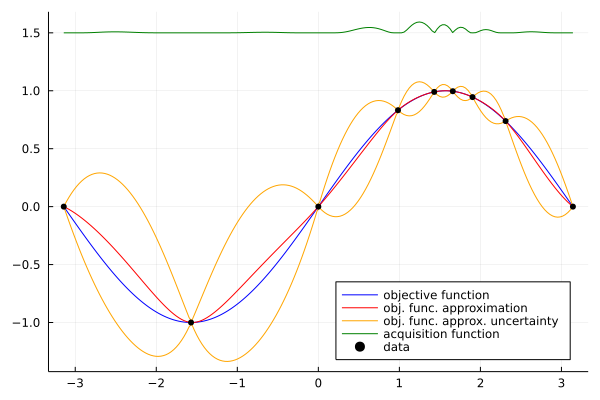

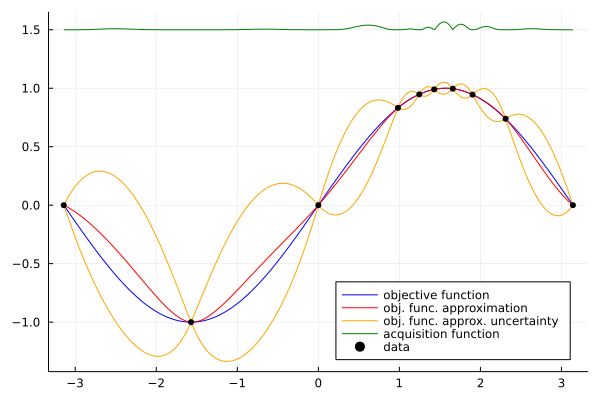

In [4]:
data = gaussian_process(obj_func, bounds, cov_func, acq_func; evals, plot_only_final=false);

You can see the optimization process on the plots.
(You can set the keyword argument `plot_only_final` to true to reduce the output length.)

To get the best function value found so far by the algorithm use the following function.

In [5]:
GP_res = get_max(data)[2]

0.9960736512094887

## Comparison to BlackBoxOptim

Now let's try to maximize our objective function using the BlackBoxOptim package
which can optimize black-box function but is not specialized to minimize the number of evaluations.

We will perform 10 runs as this optimization algorithm is stochastic.

In [6]:
using BlackBoxOptim
using Random
using Statistics
Random.seed!(555)

obj_func(x::AbstractArray{<:Real}) = - obj_func(first(x))

fitness = Float64[]
for i in 1:10
    res = bboptimize(obj_func; NumDimensions=1, SearchRange=bounds, MaxFuncEvals=evals, TraceMode=:silent);
    append!(fitness, - best_fitness(res))
end

Now let's see the average result of the BlackBoxOptim package.

In [7]:
BBO_res = mean(fitness)

0.948151616795125

We can see that the average result is significantly worse than the result of the Bayseian optimization as expected.

This of course does not prove that the Bayesian optimization performs better, but it is a simple example
showing that Bayesian optimization can work well with only few objective function evaluations.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*